In [1]:
import os

In [2]:
from eval_plot_utils import load_sl_results

df = load_sl_results()

In [3]:
model_df = df[df["model_name"] == "ViT-B/32"]
#model_df = model_df[model_df["pretrained"] == 1]
model_df = model_df[model_df["mode"] == "adapters"]
#model_df = model_df[model_df["dataset_size"] >= 0.01]
#model_df = model_df[model_df["adapter_flow"] == "easy"]
#model_df = model_df[model_df["lr"] == 1e-4]
model_df.sort_values("max_epochs").tail(10)

,val_ap,val_roc_auc,test_ap,test_roc_auc,model_name,mode,dataset_size,lr,batch_size,max_epochs,gpu,seed,num_seeds,max_steps,val_check_interval,pretrained,down_sample_size,num_gpus,adapter_flow
0,0.352479,0.794489,0.344040,0.770207,ViT-B/32,adapters,1.00,0.0001,368,32,3,1,1,-1,NaN,1.0,256.0,1.0,hard
0,0.275912,0.741351,0.262430,0.686615,ViT-B/32,adapters,0.03,0.0001,384,50,6,0,1,-1,NaN,1.0,256.0,1.0,easy
0,0.346381,0.783581,0.337165,0.758324,ViT-B/32,adapters,1.00,0.0001,384,50,7,0,1,-1,NaN,1.0,256.0,1.0,easy
0,0.312031,0.765752,0.301839,0.728798,ViT-B/32,adapters,0.10,0.0001,384,50,6,0,1,-1,NaN,1.0,256.0,1.0,easy
0,0.338889,0.781881,0.321883,0.747389,ViT-B/32,adapters,0.30,0.0001,384,50,6,0,1,-1,NaN,1.0,256.0,1.0,easy
0,0.243748,0.693224,0.235384,0.651710,ViT-B/32,adapters,0.01,0.0001,384,50,3,1,1,-1,NaN,1.0,256.0,1.0,hard
0,0.250836,0.710488,0.236215,0.649553,ViT-B/32,adapters,0.01,0.0001,384,50,6,0,1,-1,NaN,1.0,256.0,1.0,easy
0,0.312433,0.761782,0.298908,0.712671,ViT-B/32,adapters,0.10,0.0001,368,100,3,1,1,-1,NaN,1.0,256.0,1.0,hard
0,0.260812,0.708875,0.243496,0.657378,ViT-B/32,adapters,0.01,0.0001,384,100,3,1,1,-1,NaN,1.0,256.0,1.0,hard
0,0.255752,0.680853,0.237792,0.629656,ViT-B/32,adapters,0.01,0.0001,384,300,3,1,1,-1,NaN,1.0,256.0,1.0,easy


In [4]:
import matplotlib.pyplot as plt
# set better general font style
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'font.family': 'serif'})
# set font size of ticks to 12 
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
#plt.rcParams.update({'font.serif': ['Times New Roman']})

In [5]:

sub = df[df["dataset_size"] == 1.0]
sub = sub[sub["lr"] == 1e-4]
sub = sub[sub["mode"] == "adapters"]
sub = sub[sub["max_epochs"] == 20]


easy = sub[sub["adapter_flow"] == "easy"]
easy = easy[easy["dataset_size"] == 1.0]


hard = sub[sub["adapter_flow"] == "hard"]
hard = hard[hard["dataset_size"] == 1.0]


In [6]:
hard

,val_ap,val_roc_auc,test_ap,test_roc_auc,model_name,mode,dataset_size,lr,batch_size,max_epochs,gpu,seed,num_seeds,max_steps,val_check_interval,pretrained,down_sample_size,num_gpus,adapter_flow
0,0.355828,0.799319,0.342997,0.771241,ViT-B/32,adapters,1.0,0.0001,368,20,3,1,1,-1,NaN,1.0,256.0,1.0,hard


In [7]:
easy.groupby("seed").mean().reset_index(drop=True).mean()

val_ap                  0.359208
val_roc_auc             0.802752
test_ap                 0.340255
test_roc_auc            0.772200
dataset_size            1.000000
lr                      0.000100
batch_size            384.000000
max_epochs             20.000000
gpu                     7.000000
num_seeds               3.000000
max_steps              -1.000000
val_check_interval      0.100000
pretrained              1.000000
down_sample_size      256.000000
num_gpus                1.000000
dtype: float64

In [8]:

filtered_df = df[df["max_epochs"] == 10]
# drop unneeded columns
boring_cols = ["num_seeds", "num_gpus"]
filtered_df = filtered_df.drop(columns=boring_cols)

In [9]:
def clean_df(df):
    # remove columsn with only one unique val
    df = df.loc[:, (df.nunique() > 1)]
    return df

   max_epochs  val_roc_auc  test_roc_auc
0         3.0     0.559640      0.562519
1        10.0     0.631593      0.591483
2        20.0     0.685819      0.633011
3        30.0     0.682956      0.643234
4        50.0     0.701856      0.650631
5       100.0     0.708875      0.657378
6       300.0     0.680853      0.629656
   max_epochs  val_roc_auc  test_roc_auc
0         3.0          NaN           NaN
1        10.0     0.027187      0.018291
2        20.0     0.010838      0.004575
3        30.0          NaN           NaN
4        50.0     0.012208      0.001525
5       100.0          NaN           NaN
6       300.0          NaN           NaN
[  3.  10.  20.  30.  50. 100. 300.]
   test_roc_auc
0      0.562519
1      0.591483
2      0.633011
3      0.643234
4      0.650631
5      0.657378
6      0.629656
   max_epochs  val_roc_auc  test_roc_auc
0        10.0     0.739258      0.678270
1        20.0     0.754109      0.705641
2        32.0     0.766690      0.723408
3        50.0  

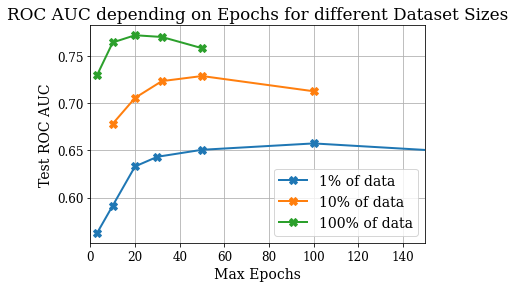

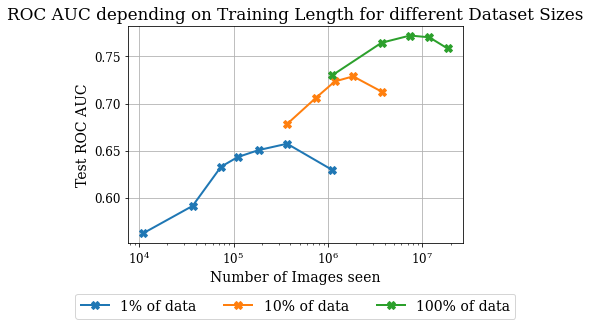

In [10]:
import matplotlib.pyplot as plt

style_kwargs = {"linestyle": "-", "marker": "X", "markersize": 8, "linewidth": 2, "grid": True}


# check effect of num epochs on performance of downscaled
ne_df = df[df["model_name"] == "ViT-B/32"]
ne_df = ne_df[ne_df["dataset_size"] == 1.0]
ne_df = ne_df[ne_df["pretrained"] == 1]
ne_df = ne_df[ne_df["mode"] == "adapters"]
ne_df = ne_df[ne_df["lr"] == 1e-4]
ne_df = ne_df[ne_df["down_sample_size"] == 256]
ne_df = ne_df[ne_df["batch_size"] == 368]
ne_df = ne_df.groupby("max_epochs").apply(lambda x: x.groupby("seed").mean()).reset_index(drop=True)
ne_df = clean_df(ne_df)
relevant_cols = ne_df[["val_roc_auc", "max_epochs", "test_roc_auc"]].sort_values("max_epochs")
#re#levant_cols.groupby("max_epochs").mean().reset_index().plot(x="max_epochs", 
# #                                                             y=["val_roc_auc", "test_roc_auc"],
#                                                              label=["Val ROC AUC", "Test ROC AUC"],
#                                                              **style_kwargs)
#plt.title("ROC AUC of B/32 trained on full dataset")
#plt.ylabel("ROC AUC")
#plt.xlabel("Max Epochs")
# -> for 100% of the data, the B/32 model performs better with 20 epochs than with 10, but it stagnates at 32
# the boost for 10% is much stronger!
# -> test with 1% of data!
ne_df.sort_values("max_epochs").groupby("max_epochs").mean().reset_index()

# check effect of num epochs on performance of downscaled
ne_df = df[df["model_name"] == "ViT-B/32"]
ne_df = ne_df[ne_df["dataset_size"] == 0.1]
ne_df = ne_df[ne_df["pretrained"] == 1]
ne_df = ne_df[ne_df["mode"] == "adapters"]
ne_df = ne_df[ne_df["lr"] == 1e-4]
ne_df = clean_df(ne_df)
ne_df = ne_df.groupby("max_epochs").apply(lambda x: x.groupby("seed").mean()).reset_index(drop=True)
relevant_cols = ne_df[["val_roc_auc", "max_epochs", "test_roc_auc"]].sort_values("max_epochs")
#relevant_cols.groupby("max_epochs").mean().reset_index().plot(x="max_epochs", 
#                                                              y=["val_roc_auc", "test_roc_auc"],
#                                                              label=["Val ROC AUC", "Test ROC AUC"],
#                                                              **style_kwargs)
#plt.title("ROC AUC of B/32 trained on 10%  of dataset")
#plt.ylabel("ROC AUC")
#plt.xlabel("Max Epochs")
#plt.show()
# -> for 10% of the data, the B/32 model performs better with 32 epochs than with 10.
# But maybe the same goes for full dataset size??


def plot_epoch_effect(ds_size, metrics="both", ax=None, x="max_epochs", c=None):
    # check effect of num epochs on performance of downscaled
    ne_df = df[df["model_name"] == "ViT-B/32"]
    ne_df = ne_df[ne_df["dataset_size"] ==ds_size]
    ne_df = ne_df[ne_df["pretrained"] == 1]
    ne_df = ne_df[ne_df["mode"] == "adapters"]
    ne_df = ne_df[ne_df["lr"] == 1e-4]
    ne_df = ne_df.groupby("max_epochs").apply(lambda x: x.groupby("seed").mean()).reset_index(drop=True)
    ne_df = clean_df(ne_df)
    relevant_cols = ne_df[["val_roc_auc", "max_epochs", "test_roc_auc"]].sort_values("max_epochs")
    if metrics == "both":
        y = ["val_roc_auc", "test_roc_auc"]
        label = ["Val ROC AUC", "Test ROC AUC"]
        y_label = "ROC AUC"
        if ax is not None:
            label = [f"{ds_size * 100}% of data " + l for l in label]
    elif metrics == "val":
        y = ["val_roc_auc"]
        label = ["Val ROC AUC"]
        y_label = "Val ROC AUC"
        if ax is not None:
            label = [f"{ds_size * 100}% of data" for l in label]
    elif metrics == "test":
        y = ["test_roc_auc"]
        label = ["Test ROC AUC"]
        y_label = "Test ROC AUC"
        if ax is not None:
            label = [f"{int(ds_size * 100)}% of data" for l in label]
    
        
    if x == "imgs_seen":
        num_train_imgs = 368960
        relevant_cols["imgs_seen"] = relevant_cols["max_epochs"] * num_train_imgs * ds_size
        x_label = "Number of Images seen"
        plt.xscale("log", base=10)
    else:
        x_label = "Max Epochs"
        
        
    means = relevant_cols.groupby("max_epochs").mean().reset_index()
    std = relevant_cols.groupby("max_epochs").std().reset_index()
    print(means)
    print(std)
    means.plot(x=x,
                y=y,
                label=label,
                ax=ax,
                c=c,
                **style_kwargs)
    
    #if ax is not None:
    #    ax.fill_between(means[x], means[y] - std[y], means[y] + std[y], alpha=0.2, color=c)
    
    print(relevant_cols["max_epochs"].unique())
    print(means[y])
    if ax is None:
        plt.title(f"ROC AUC of B/32 trained on {ds_size * 100} %  of dataset")
    plt.ylabel(y_label)
    plt.xlabel(x_label)
    
    
# three colors that are distinguishable and show increase in datset size
colors = ["#1f77b4", "#ff7f0e", "#2ca02c"]

mode = "test"

ax = plt.figure().gca()
plot_epoch_effect(0.01, ax=ax, metrics=mode, c= colors[0])
plot_epoch_effect(0.1, ax=ax, metrics=mode, c= colors[1])
plot_epoch_effect(1.0, ax=ax, metrics=mode, c= colors[2])
plt.title("ROC AUC depending on Epochs for different Dataset Sizes")
plt.xlim(0, 150)

plt.savefig("plots/epoch_effect_SL.pdf", dpi=300, bbox_inches="tight")

ax = plt.figure().gca()

plot_epoch_effect(0.01, ax=ax, metrics=mode, x="imgs_seen", c= colors[0])
plot_epoch_effect(0.1, ax=ax, metrics=mode, x="imgs_seen", c= colors[1])
plot_epoch_effect(1.0, ax=ax, metrics=mode, x="imgs_seen", c= colors[2])
plt.title("ROC AUC depending on Training Length for different Dataset Sizes")
# move legend below x-axis
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=3)
# move legend above plot
#plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.3), ncol=3)
plt.savefig("plots/num_imgs_effect_SL.pdf", dpi=300, bbox_inches="tight")

In [11]:
ne_df.sort_values("max_epochs")

,val_ap,val_roc_auc,test_ap,test_roc_auc,batch_size,max_epochs,gpu,num_seeds
0,0.263350,0.735543,0.255041,0.674961,368.0,10.0,2.0,3.0
1,0.264358,0.737796,0.256357,0.676179,368.0,10.0,2.0,3.0
2,0.269198,0.737286,0.259196,0.678705,368.0,10.0,2.0,3.0
3,0.270793,0.741690,0.261197,0.684761,256.0,10.0,2.0,1.0
4,0.268593,0.744520,0.256388,0.677092,256.0,10.0,2.0,1.0
5,0.266970,0.738714,0.255987,0.677924,256.0,10.0,2.0,1.0
6,0.286769,0.750390,0.280351,0.707244,384.0,20.0,7.0,3.0
7,0.287320,0.755310,0.274371,0.707082,384.0,20.0,7.0,3.0
8,0.282976,0.756628,0.275924,0.702599,384.0,20.0,7.0,3.0
9,0.303628,0.766690,0.290668,0.723408,368.0,32.0,3.0,1.0


ViT-B/32 10
['easy']
     val_ap  val_roc_auc   test_ap  test_roc_auc model_name      mode  \
0  0.222134     0.672470  0.207523      0.605946   ViT-B/32  adapters   
0  0.221279     0.653925  0.210788      0.613752   ViT-B/32  adapters   
0  0.207052     0.632794  0.199307      0.590447   ViT-B/32  adapters   
0  0.243176     0.700783  0.227804      0.633291   ViT-B/32  adapters   
0  0.244436     0.710061  0.232151      0.641502   ViT-B/32  adapters   
0  0.246341     0.707678  0.230256      0.637120   ViT-B/32  adapters   
0  0.270793     0.741690  0.261197      0.684761   ViT-B/32  adapters   
0  0.266970     0.738714  0.255987      0.677924   ViT-B/32  adapters   
0  0.268593     0.744520  0.256388      0.677092   ViT-B/32  adapters   
0  0.311742     0.779416  0.299519      0.733351   ViT-B/32  adapters   
0  0.311245     0.780567  0.300607      0.732556   ViT-B/32  adapters   
0  0.311712     0.778211  0.303409      0.733858   ViT-B/32  adapters   
0  0.350085     0.797819  0.33

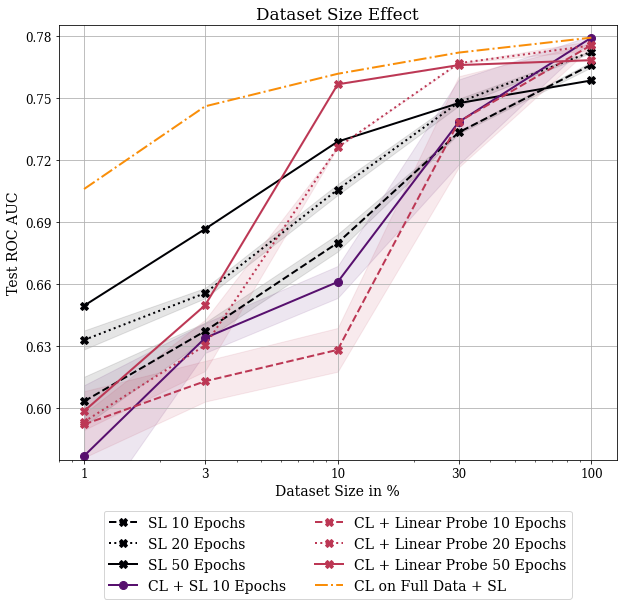

In [12]:
# get inferno cmap 
cmap = plt.get_cmap("inferno")#"inferno")
# set colors in plots to use cmap
import numpy as np
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", [cmap(i) for i in np.linspace(0, 1, 5)])

# set color cycler to 5 high contrast colors without any greens 
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd"]

# set color cycler to easily distinguishable colors
colors = ["#1f77b4", "#ff7f0e", "#9467bd", "#d62728",]
#colors = ["#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
#plt.rcParams["axes.prop_cycle"] = plt.cycler("color", colors)



# make plot showing dataset size effect
# reset color palettes to default
# import cycler
#plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['b', 'g', 'r', 'c', 'm', 'y', 'k'])

eval_split = "test" # "test"

models = ["ViT-B/32"]#, "ViT-L/14"]

ax = plt.figure(figsize=(10,8)).gca()
for name in models:
    color = next(ax._get_lines.prop_cycler)['color']
    for max_epochs in [10, 20, 50]:
        print(name, max_epochs)
        #metric = ["val_roc_auc", "test_roc_auc"]
        #metric = "test_roc_auc"
        metric = f"{eval_split}_roc_auc"
        
        if name == "ViT-B/32":
            lr = 1e-4
        else:
            lr = 3e-5
        
        model_df = df[df["model_name"] == name]
        model_df = model_df[model_df["pretrained"] == 1]
        model_df = model_df[model_df["mode"] == "adapters"]
        model_df = model_df[model_df["dataset_size"] >= 0.01]
        model_df = model_df[model_df["adapter_flow"] == "easy"]
        model_df = model_df[model_df["lr"] == lr].sort_values("dataset_size")

        
        model_df = model_df[model_df["max_epochs"] == max_epochs]
        print(model_df["adapter_flow"].unique())
        #model_df = clean_df(model_df)
        
        if len(model_df) == 0 or len(model_df.columns) == 0 or not "dataset_size" in model_df.columns:
            print(f"Skip {name} with {max_epochs} epochs")
            continue
        
        
        print(model_df)
        model_df = model_df.groupby("dataset_size").apply(lambda x: x.groupby("seed").mean()).reset_index(drop=True)

        
        # get std over same dataset size
        std = model_df.groupby("dataset_size").std()[metric]
        print("STD: ", std)
        # take average over same dataset size
        model_df = model_df.groupby("dataset_size").mean().reset_index()
        print(model_df)
        model_df["dataset_size"] *= 100
        
        #style = "-X" if max_epochs == 20 else "--X"
        if max_epochs == 10:
            style = "--X"
        elif max_epochs == 20:
            style = ":X"
        elif max_epochs == 50:
            style = "-X"
        
        model_df.plot(x="dataset_size", y=metric, ax=ax, label=f"SL {max_epochs} Epochs",
                      style=style, linewidth=2, markersize=8, color=color,
                    )
        #get color of line
        color = ax.lines[-1].get_color()
        
        
        # ADD ERRORBAR
        means = model_df.groupby("dataset_size").mean()[metric].to_numpy()
        lower, upper = means - std, means + std
        sizes = model_df["dataset_size"].unique()
        ax.fill_between(sizes, lower, upper, alpha=0.1, color=color)

        ax.set_xscale("log", base=10)    
        # make a grid appear
        ax.grid(True)
        ax.set_xlabel("Dataset size in %")
        ax.set_ylabel(f"{eval_split[0].upper() + eval_split[1:]} ROC AUC")
        
        import matplotlib.ticker as mticker
        ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
        
from eval_plot_utils import load_cl_results, cl_plot_ds_size
cl_df = load_cl_results().sort_values("lin_probe_mean_test_auc")

cl_plot_ds_size(cl_df, ax=ax, mode=eval_split, max_epochs=[20,50])


plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=3)

# put legend above plot
#plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.3), ncol=3)

full_df = cl_df[cl_df["dataset_size"] == 1.0]
full_df = full_df[full_df["randomize_order"] == 1]
full_df = full_df[full_df["lr"] == 3e-4]
full_df = full_df[full_df["mode"] == "adapters"]
full_df = full_df[full_df["adapter_flow"] == "easy"]
full_df = full_df[full_df["num_gpus"] == 1]
full_df = full_df[full_df["mixup_alpha"] == 0]
full_df = full_df[full_df["batch_size"] == 192]
full_df = full_df[full_df["max_epochs"] == 10]

full_df = full_df.groupby("seed").apply(lambda x: x.groupby("sl_dataset_size").mean().reset_index()).reset_index(drop=True)

full_df = clean_df(full_df).sort_values("sl_dataset_size")

#metrics = ["full_test_auc", "adapters_test_auc"]
metrics = ["adapters_test_auc"]#, "lin_probe_mean_test_auc"]
# metrics = ["lin_probe_mean_test_auc"] # lin probe perf cannot be used because it uses the orig dataset_size not sl_dataset_size

full_df["sl_dataset_size"] *= 100
means = full_df.groupby("sl_dataset_size").mean().reset_index()
stds = full_df.groupby("sl_dataset_size").std().reset_index()
ax = means.reset_index().plot(x="sl_dataset_size",
                            y=metrics,
                        #"covid_mean_test_auc"],
                            style="-.",
                            label=[f"CL on Full Data + SL"],#, f"CL on Full Data + Linear Probe"],
                            ax=ax,
                            linewidth=2,
                            markersize=8,
                            grid=True)

# errorbar
for metric in metrics:
    color = ax.lines[-1].get_color()
    ax.fill_between(means["sl_dataset_size"], means[metric] - stds[metric], means[metric] + stds[metric], alpha=0.1, color=color)


plt.xscale("log", base=10)


# get legend names
legend_name = plt.legend().texts[0].get_text()
print("Legend name: ", legend_name)
# put legend below figure
plt.legend(loc="upper center", bbox_to_anchor=(0.5, -0.1), ncol=2)
clean_df(means)


plt.xlabel("Dataset Size in %")
plt.ylabel("Test ROC AUC")
plt.title("Dataset Size Effect")
plt.ylim(0.575, 0.785)

# make x tick where we have measurements
plt.xticks(means["sl_dataset_size"].unique())

import matplotlib.ticker as mticker
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())

# make y ticks sparser
ax.yaxis.set_major_locator(mticker.MultipleLocator(0.03))

save_folder = "plots/cl"
import os
os.makedirs(save_folder, exist_ok=True)
plt.savefig(f"{save_folder}/dataset_size_effect.pdf", bbox_inches="tight")

In [13]:
next(ax._get_lines.prop_cycler)["color"]

(0.988362, 0.998364, 0.644924, 1.0)

In [14]:
means

,sl_dataset_size,lin_probe_mean_val_auc,lin_probe_mean_test_auc,val_zero_shot_auc_Impression:_,test_zero_shot_auc_Impression:_,val_zero_shot_auc_FINDINGS:,test_zero_shot_auc_FINDINGS:,val_zero_shot_auc_averaged,test_zero_shot_auc_averaged,text2img_num_steps,...,rsna_mean_val_auc,rsna_mean_test_auc,adapters_test_auc,adapters_val_auc,full_test_auc,full_val_auc,new_adapters_test_auc,new_adapters_val_auc,chexpert_mean_val_auc,chexpert_mean_test_auc
0,1.0,0.806289,0.774935,0.663405,0.647571,0.662092,0.639769,0.662017,0.646972,100.000000,...,NaN,NaN,0.705913,0.750976,0.706582,0.757116,0.588000,0.604032,NaN,NaN
1,3.0,0.806289,0.774935,0.663405,0.647571,0.662092,0.639769,0.662017,0.646972,100.000000,...,NaN,NaN,0.745835,0.774045,0.742652,0.771436,0.622648,0.672161,NaN,NaN
2,10.0,0.806289,0.774935,0.663405,0.647571,0.662092,0.639769,0.662017,0.646972,100.000000,...,NaN,NaN,0.761553,0.786635,0.758785,0.793463,0.650044,0.705475,NaN,NaN
3,30.0,0.806289,0.774935,0.663405,0.647571,0.662092,0.639769,0.662017,0.646972,100.000000,...,NaN,NaN,0.771787,0.799435,0.768324,0.803199,0.715327,0.765522,NaN,NaN
4,100.0,0.807017,0.775403,0.664152,0.649779,0.661663,0.648873,0.667093,0.652777,136.363636,...,0.906091,0.907083,0.779005,0.810983,0.775323,0.808960,0.776876,0.807648,0.798978,0.857111


In [15]:
more_epochs = cl_df[cl_df["max_epochs"] > 10]
more_epochs


,lin_probe_mean_val_auc,lin_probe_mean_test_auc,val_zero_shot_auc_Impression:_,test_zero_shot_auc_Impression:_,val_zero_shot_auc_FINDINGS:,test_zero_shot_auc_FINDINGS:,val_zero_shot_auc_averaged,test_zero_shot_auc_averaged,model_name,mode,...,adapters_test_auc,adapters_val_auc,full_test_auc,full_val_auc,new_adapters_test_auc,new_adapters_val_auc,chexpert_mean_val_auc,chexpert_mean_test_auc,cyclic_lambda,missing_mode
0,0.623237,0.590222,0.570921,0.514022,0.564635,0.516696,0.568545,0.515595,ViT-B/32,adapters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,zeros
0,0.656023,0.590724,0.594473,0.541995,0.594521,0.541614,0.594506,0.541808,ViT-B/32,adapters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,zeros
0,0.624833,0.593976,0.588700,0.537092,0.589504,0.536313,0.589053,0.536758,ViT-B/32,adapters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,zeros
0,0.663573,0.594389,0.608870,0.548943,0.609425,0.549198,0.609123,0.549062,ViT-B/32,adapters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,zeros
0,0.637889,0.596323,0.579195,0.530262,0.590385,0.535860,0.586434,0.533796,ViT-B/32,adapters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,zeros
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.809596,0.777641,0.696739,0.668441,0.675106,0.650094,0.690821,0.663021,ViT-B/32,adapters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1,zeros
0,0.806926,0.777652,0.685792,0.633194,0.665537,0.635646,0.678852,0.636884,ViT-B/32,adapters,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,zeros
0,0.809397,0.778396,NaN,NaN,NaN,NaN,NaN,NaN,ViT-B/32,adapters,...,0.773929,0.801503,0.774112,0.808301,NaN,NaN,NaN,NaN,0.0,zeros
0,0.808675,0.779962,NaN,NaN,NaN,NaN,NaN,NaN,ViT-B/32,adapters,...,0.776250,0.806003,0.777036,0.806040,NaN,NaN,NaN,NaN,0.0,zeros


In [16]:
mode = "adapters" # "full", "adapters"

# check tuning results for mode
mask = filtered_df["mode"] == mode
if mode != "adapters":
    mask[filtered_df["model_name"].apply(lambda x: "RN50" in x or "densenet" in x)] = True
full_df = filtered_df[mask]
full_df = full_df.sort_values(by=["val_roc_auc"], ascending=False)
full_df = full_df[full_df["dataset_size"] == 1.0]

# take row with highest val_roc_auc score per model 
full_df.groupby("model_name").apply(lambda x: x.nlargest(1, "val_roc_auc"))

,,val_ap,val_roc_auc,test_ap,test_roc_auc,model_name,mode,dataset_size,lr,batch_size,max_epochs,gpu,seed,max_steps,val_check_interval,pretrained,down_sample_size,adapter_flow
model_name,,,,,,,,,,,,,,,,,,
ViT-B/16,0,0.361021,0.806796,0.340184,0.773965,ViT-B/16,adapters,1.0,0.00010,64,10,6,0,-1,NaN,1.0,256.0,hard
ViT-B/32,0,0.350346,0.802082,0.334991,0.769105,ViT-B/32,adapters,1.0,0.00010,256,10,7,0,-1,NaN,1.0,256.0,hard
ViT-L/14,0,0.370322,0.812293,0.350004,0.779008,ViT-L/14,adapters,1.0,0.00003,16,10,0,0,-1,NaN,0.0,256.0,hard


Flow:  hard
Empty DataFrame
Columns: []
Index: [0]
ViT-B/32 hard
       lr    val_ap  val_roc_auc   test_ap  test_roc_auc  dataset_size  \
0  0.0001  0.350346     0.802082  0.334991      0.769105           1.0   

   batch_size  max_epochs  gpu  seed  max_steps  val_check_interval  \
0       256.0        10.0  7.0   0.0       -1.0                 NaN   

   pretrained  down_sample_size  
0         1.0             256.0  

Flow:  hard
Flow:  hard
Saved to plots/adapters_transformer_lr_tuning_cnn_transformer.pdf


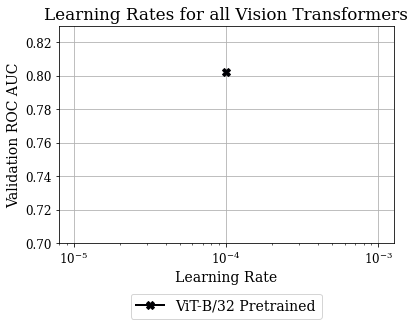

In [17]:
# make plot per model name, showing how the val_roc_auc score changes over different learning rates
import matplotlib.pyplot as plt

down_sample_size = 256
all_in_one = True
pretrained = 1 # 1, 0, "both"
separate_cnn_transformer = True
flow = "hard"

if not separate_cnn_transformer:
    ax = plt.figure().gca() if all_in_one else None


transformer_fig = plt.figure()
transformer_ax = transformer_fig.gca()
if mode != "adapters":
    cnn_fig = plt.figure()
    cnn_ax = cnn_fig.gca()
else:
    cnn_fig = None
    cnn_ax = None
#cnn_ax = plt.figure().gca() if mode != "adapters" else None

# rename densenet
full_df = full_df.replace({"model_name": {"densenet_256": "DenseNet121"}})


models = ["DenseNet121", "RN50", "RN50x4", "ViT-B/32", "ViT-B/16", "ViT-L/14"]
for model_name in models:
    #sorted(full_df["model_name"].unique()):
    df_model = full_df[full_df["model_name"] == model_name].sort_values(by=["lr"], ascending=True)
    
    if len(df_model) == 0:
        continue
        
    
    c = None
    pretrained_options = [0, 1] if pretrained == "both" else [pretrained]
    for p in pretrained_options:
        
        
        flow_options = ["easy", "hard"] if flow == "both" else [flow]
        for f in flow_options:
            print("Flow: ", f)
            if mode == "adapters":
                plot_df = df_model[df_model["down_sample_size"] == down_sample_size]
                plot_df = plot_df[plot_df["adapter_flow"] == f]
            else:
                plot_df = df_model.copy()

            plot_df = plot_df[plot_df["pretrained"] == p]
            
            # TODO: below is only used for easy flow analysis
            #if model_name == "ViT-B/32":
            plot_df = plot_df[plot_df["batch_size"] == 256]
            
            if len(plot_df) == 0:
                continue
            
            print(clean_df(plot_df))

            style = "-X" if p == 1 else "--X"
            if flow == "both":
                style = "-X" if f == "easy" else "--X"
            
            label = f"{model_name} Pretrained" if p == 1 else f"{model_name} Randomized"
            if flow == "both":
                label += f" {f}"
            # lr must be between 1e-6 and 1e-4
            plot_df = plot_df[(plot_df["lr"] >= 1e-6) & (plot_df["lr"] <= 3e-4)]
            
            
            plot_df = plot_df.groupby("lr").mean().reset_index()
            print(model_name, f)
            print(plot_df)
            print()
            # determine in which axis to plot
            if separate_cnn_transformer:
                if "ViT" in model_name:
                    current_ax = transformer_ax
                else:
                    current_ax = cnn_ax
            else:
                current_ax = ax
            plot_df.plot(x="lr", y="val_roc_auc", title=model_name, 
                        label=label, 
                        ax=current_ax,
                        style=style, c=c, markersize=8, linewidth=2)
            # get plot color
            c = current_ax.lines[-1].get_color()
            
            
            current_ax.set_xlabel("Learning Rate")
            current_ax.set_ylabel("Validation ROC AUC")
        
            #df_model.plot(x="lr", y="val_roc_auc", title=model_name, label=model_name, ax=ax,
            #             style="-X")
            # make x axis in log scal
            current_ax.set_xscale("log")
            # make it more beautiful
            current_ax.grid(True)
            #current_ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.,
            #                    fontsize=14)
            current_ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.2), ncol=3)

            current_ax.set_ylim(0.70, 0.83)
            #current_ax.set_xlim(10e-7 * 0.9, 1e-4 * 1.1)
            
            if all_in_one:
                model_type = "Vision Transformers" if "ViT" in model_name else "CNNs"
                current_ax.set_title(f"Learning Rates for all {model_type}")
            else:
                plt.show()


if separate_cnn_transformer:
    os.makedirs("plots", exist_ok=True)
    # save figures to plots folder
    for name, ax, fig in zip(["transformer", "cnn"], [transformer_ax, cnn_ax], [transformer_fig, cnn_fig]):
        if fig is None:
            continue
        save_path = f"plots/{mode}_{name}_lr_tuning_cnn_transformer.pdf"
        fig.savefig(save_path, dpi=300, bbox_inches="tight")
        print(f"Saved to {save_path}")

In [18]:
plot_df

,val_ap,val_roc_auc,test_ap,test_roc_auc,model_name,mode,dataset_size,lr,batch_size,max_epochs,gpu,seed,max_steps,val_check_interval,pretrained,down_sample_size,adapter_flow


In [19]:
#  little lr tuning for adapter with easy flow (done above - same ideal lr)

      val_ap  val_roc_auc   test_ap  test_roc_auc model_name      mode  \
0   0.370322     0.812293  0.350004      0.779008   ViT-L/14  adapters   
0   0.366671     0.811999  0.349602      0.778499   ViT-L/14  adapters   
0   0.362819     0.811340  0.350087      0.778802   ViT-L/14  adapters   
0   0.364923     0.809314  0.346851      0.778348   ViT-L/14  adapters   
0   0.361021     0.806796  0.340184      0.773965   ViT-B/16  adapters   
..       ...          ...       ...           ...        ...       ...   
0   0.239898     0.703303  0.223942      0.638387   ViT-B/32  adapters   
0   0.237934     0.702695  0.228379      0.638774   ViT-B/32  adapters   
0   0.223017     0.675365  0.211305      0.616384   ViT-B/32  adapters   
0   0.222908     0.673703  0.211029      0.611140   ViT-B/32  adapters   
0   0.222704     0.666120  0.212114      0.611812   ViT-L/14  adapters   

    dataset_size        lr  batch_size  max_epochs  gpu  seed  max_steps  \
0            1.0  0.000030         

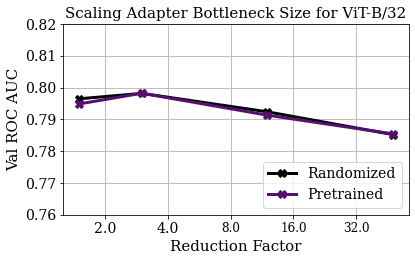

In [20]:
# check tuning results for mode
adapter_df = filtered_df[filtered_df["mode"] == "adapters"].sort_values(by=["val_roc_auc"], ascending=False)
adapter_df = adapter_df[adapter_df["dataset_size"] == 1.0]
adapter_df = adapter_df[adapter_df["adapter_flow"] == "hard"]

print(adapter_df)
# plot performance relating to down_sample_size
for model_name in adapter_df["model_name"].unique():
    df_model = adapter_df[adapter_df["model_name"] == model_name].sort_values(by=["down_sample_size"], ascending=True)
    
    if len(df_model) == 0:
        continue
    
    # tests werde done with lr of 0.0001, so filter
    df_model = df_model[df_model["lr"] == 0.0001]
    
    
    if len(df_model["down_sample_size"].unique()) == 1:
        continue
    
    print(df_model[["model_name", "lr", "val_roc_auc", "down_sample_size", "pretrained"]])
    
    ax = plt.figure().gca()
    for pretrained in [0, 1]:
        plot_df = df_model[df_model["pretrained"] == pretrained]
        plot_df = plot_df.groupby("down_sample_size").apply(lambda x: x.groupby("seed").mean()).reset_index(drop=True)
        plot_df = plot_df.groupby("down_sample_size").mean().reset_index()
        plot_df["reduction_factor"] = 768 / plot_df["down_sample_size"] 
        plot_df.plot(x="reduction_factor", y="val_roc_auc",
                        label="Pretrained" if pretrained else "Randomized",
                        title=model_name, ax=ax, kind="line", style="-X", markersize=8, linewidth=3)
    # make it more readable
    ax.legend(loc="lower right")
    # make a grid appear
    ax.grid(True)
    # mark line with "x" where there are points
    ax.set_xticks(plot_df["reduction_factor"].unique())
        
    # scale all font sizes nicely
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14)
    # scale legend font size too
    for t in ax.get_legend().get_texts():
        t.set_fontsize(14)
    
        
    # increase font size of title, x-axis and y-axis
    size = 15
    ax.set_title("Scaling Adapter Bottleneck Size for " + model_name, fontsize=size)
    ax.set_xlabel("Reduction Factor", fontsize=size)
    ax.set_ylabel("Val ROC AUC", fontsize=size)
    
    plt.ylim(0.76, 0.82)
    # make plot more beautiful
    plt.tight_layout()
    # make it even nicer
    plt.subplots_adjust(top=0.85)
    
    plt.xscale("log", base=2)
    import matplotlib.ticker as mticker
    ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
    
    plt.savefig("plots/adapter_bottleneck_size.pdf", dpi=300, bbox_inches="tight")

    plt.show()

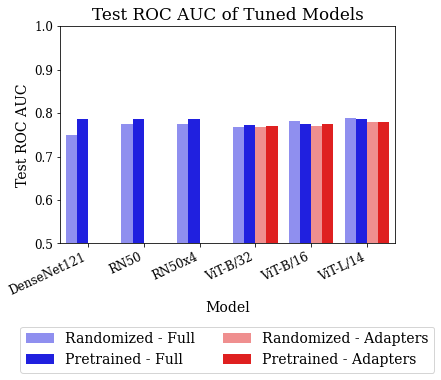

In [21]:
# make bar chart comparing model performance, showing how each model performs next to each other
# per model we have 4 bars for each mode and whether the weights are pretrained or not
plot_df = filtered_df[filtered_df["down_sample_size"] == 256]

plot_df = plot_df[(plot_df["mode"] != "adapters") | (plot_df["adapter_flow"] == "hard")]
# make plot
plot_df = plot_df.groupby(["model_name", "pretrained", "mode"]).apply(lambda x: x.nlargest(1, "val_roc_auc")).reset_index(drop=True)
# make bar chart
#plot_df.plot(x="model_name", y=["val_roc_auc"], kind="bar",
#                title="Performance of models",
#                legend=False,
#                figsize=(12, 8))   

import seaborn as sns

pretrain_str = plot_df["pretrained"].map({0: "Randomized", 1: "Pretrained"})
mode_str = plot_df["mode"].map({"full": "Full", "adapters": "Adapters"})
plot_df["type"] = pretrain_str + " - " + mode_str

# rename model_name in plot_df 
plot_df["model_name"] = plot_df["model_name"].apply(lambda x: "DenseNet121" if x == "densenet_256" else x)

# define rgb matplotlib colors  
red = (1, 0, 0)
dark_red = (0.5, 0, 0)
blue = (0, 0, 1)
dark_blue = (0, 0, 0.5)
beautiful_blue = (0.5, 0.5, 1)
beautiful_red = (1, 0.5, 0.5)

colors = [beautiful_blue, blue, beautiful_red, red]

# set magma paletter 
palette = sns.color_palette(colors)
sns.set_palette(palette)
plt.figure()
ax = sns.barplot(x='model_name', y='test_roc_auc', hue="type", data=plot_df, 
                 order=["DenseNet121", "RN50", "RN50x4", "ViT-B/32", "ViT-B/16", "ViT-L/14"],
                 )#hue_order=["Randomized - Adapters", "Randomized - Full", "Pretrained - Adapters", "Pretrained - Full"])  
# for val :plt.ylim(0.775, 0.825)
#plt.ylim(0.74, 0.8)
plt.ylim(0.5, 1.0)

# move legend to the top
#ax.legend(loc="upper center", bbox_to_anchor=(0.5, 1.4), ncol=2, fancybox=True, shadow=True)
ax.legend(loc="upper center", bbox_to_anchor=(0.5, -0.35), ncol=2)

plt.xlabel("Model") 
plt.ylabel("Test ROC AUC")
#plt.tight_layout()

plt.title("Test ROC AUC of Tuned Models")

# fix x-axis labels
x_labels = ax.get_xticklabels()
ax.set_xticklabels(x_labels, rotation=25, ha="right")

plt.savefig("plots/tuned_models_performance.pdf", dpi=300, bbox_inches="tight")


In [22]:
plot_df

,val_ap,val_roc_auc,test_ap,test_roc_auc,model_name,mode,dataset_size,lr,batch_size,max_epochs,gpu,seed,max_steps,val_check_interval,pretrained,down_sample_size,adapter_flow,type
0,0.353447,0.802861,0.345213,0.775597,RN50,full,1.0,0.000100,128,10,2,0,-1,NaN,0.0,256.0,hard,Randomized - Full
1,0.371692,0.812867,0.362994,0.785423,RN50,full,1.0,0.000030,128,10,2,0,-1,NaN,1.0,256.0,hard,Pretrained - Full
2,0.359250,0.804913,0.349229,0.775217,RN50x4,full,1.0,0.000030,64,10,4,0,-1,NaN,0.0,256.0,hard,Randomized - Full
3,0.376761,0.819862,0.360447,0.786592,RN50x4,full,1.0,0.000010,64,10,4,0,-1,NaN,1.0,256.0,hard,Pretrained - Full
4,0.356304,0.805952,0.338645,0.770779,ViT-B/16,adapters,1.0,0.000030,64,10,6,0,-1,NaN,0.0,256.0,hard,Randomized - Adapters
5,0.374405,0.809602,0.355160,0.781938,ViT-B/16,full,1.0,0.000010,64,10,4,0,-1,NaN,0.0,256.0,hard,Randomized - Full
6,0.361021,0.806796,0.340184,0.773965,ViT-B/16,adapters,1.0,0.000100,64,10,6,0,-1,NaN,1.0,256.0,hard,Pretrained - Adapters
7,0.370574,0.810184,0.349752,0.773848,ViT-B/16,full,1.0,0.000030,64,10,4,0,-1,NaN,1.0,256.0,hard,Pretrained - Full
8,0.348029,0.798632,0.335040,0.768104,ViT-B/32,adapters,1.0,0.000100,256,10,3,0,-1,NaN,0.0,256.0,hard,Randomized - Adapters
9,0.363059,0.807914,0.342224,0.768261,ViT-B/32,full,1.0,0.000010,256,10,3,0,-1,NaN,0.0,256.0,hard,Randomized - Full


In [23]:
best_pretrained_models = plot_df[plot_df["pretrained"] == 1]
clean_df(best_pretrained_models)

,val_ap,val_roc_auc,test_ap,test_roc_auc,model_name,mode,lr,batch_size,gpu,type
1,0.371692,0.812867,0.362994,0.785423,RN50,full,0.000030,128,2,Pretrained - Full
3,0.376761,0.819862,0.360447,0.786592,RN50x4,full,0.000010,64,4,Pretrained - Full
6,0.361021,0.806796,0.340184,0.773965,ViT-B/16,adapters,0.000100,64,6,Pretrained - Adapters
7,0.370574,0.810184,0.349752,0.773848,ViT-B/16,full,0.000030,64,4,Pretrained - Full
10,0.350346,0.802082,0.334991,0.769105,ViT-B/32,adapters,0.000100,256,7,Pretrained - Adapters
11,0.367013,0.804247,0.343184,0.771586,ViT-B/32,full,0.000010,256,3,Pretrained - Full
14,0.366671,0.811999,0.349602,0.778499,ViT-L/14,adapters,0.000030,16,0,Pretrained - Adapters
15,0.380194,0.812848,0.360779,0.786739,ViT-L/14,full,0.000003,8,7,Pretrained - Full
17,0.369930,0.811720,0.360730,0.785268,DenseNet121,full,0.000100,128,5,Pretrained - Full
